Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advance Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
**Name** | De los Reyes, Jann Moises Nyll B.
**Section** | CPE31S3
**Date Performed**: | January 27, 2024
**Date Submitted**: | February 02, 2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "/content/pima-indians-diabetes (1).csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
747,1,81,74,41,57,46.3,1.096,32,0
684,5,136,82,0,0,0.0,0.640,69,0
411,1,112,72,30,176,34.4,0.528,25,0
479,4,132,86,31,0,28.0,0.419,63,0
28,13,145,82,19,110,22.2,0.245,57,0


In [ ]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4030 - loss: 0.7692 - val_accuracy: 0.4167 - val_loss: 0.7539
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4166 - loss: 0.7537 - val_accuracy: 0.4323 - val_loss: 0.7452
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4201 - loss: 0.7536 - val_accuracy: 0.4375 - val_loss: 0.7370
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4407 - loss: 0.7431 - val_accuracy: 0.4427 - val_loss: 0.7293
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4671 - loss: 0.7305 - val_accuracy: 0.4479 - val_loss: 0.7220
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4815 - loss: 0.7225 - val_accuracy: 0.4583 - val_loss: 0.7152
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5299 - loss: 0.6982 - val_accuracy: 0.4688 - val_loss: 0.7087
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5130 - loss: 0.7121 - val_accuracy: 0.4740 - 

In [ ]:
predict_x = model.predict(X_test_norm)
classes_x = np.argmax(predict_x, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)  # Get prediction probabilities
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int) # Convert probabilities to class predictions (0 or 1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.5543312 ],
       [0.6622211 ],
       [0.29766244],
       [0.29785973],
       [0.15071392],
       [0.5545716 ],
       [0.12527676],
       [0.3993809 ],
       [0.81022954],
       [0.22050647]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.760
roc-auc is 0.818


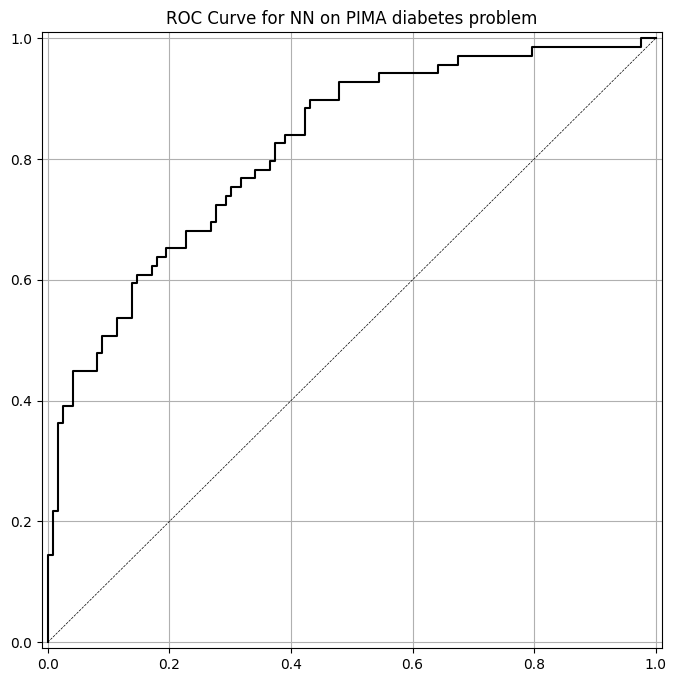

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

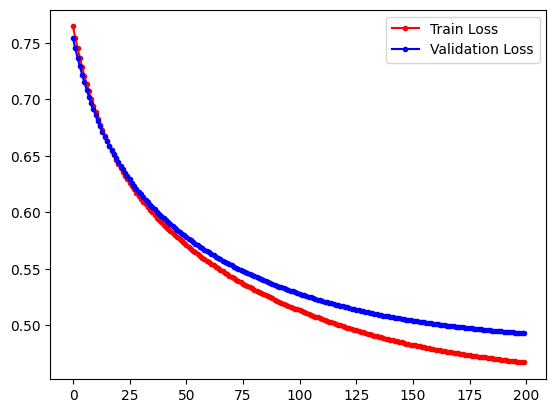

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

<font color = orange> In this activity we train a neural network model  for binary classification using Pima Indians Diabetes dataset. During the training, both validation and training loss  decreases which indicates that the model is learning and improving  its ability to predict the target variable. We can also notice that after a certain number of epoch, the validation loss start to slightly increase, while the training loss continous to decrease. This could be sign of overfitting  which the model is too complex and learns the training to well including the noise and fluctuations which lead to poor generalization of data.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
# import the necessary libraries and file

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

filepath = "/content/pima-indians-diabetes (1).csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
# Normalize the data
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
#Build a model with two hidden layers, each with 6 nodes
#Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Use a learning rate of .003 and train for 1500 epochs
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3649 - loss: 0.7895 - val_accuracy: 0.3958 - val_loss: 0.7600
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3983 - loss: 0.7790 - val_accuracy: 0.3906 - val_loss: 0.7505
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3746 - loss: 0.7585 - val_accuracy: 0.3958 - val_loss: 0.7421
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4287 - loss: 0.7531 - val_accuracy: 0.4115 - val_loss: 0.7345
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4280 - loss: 0.7397 - val_accuracy: 0.4219 - val_loss: 0.7277
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4859 - loss: 0.7434 - val_accuracy: 0.4583 - val_loss: 0.7215
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4434 - loss: 0.7273 - val_accuracy: 0.4635 - val_loss: 0.7159
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4474 - loss: 0.7308 - val_accuracy: 0

<font color = orange> For this particular model which has 2 hidden layer with 6 nodes each and has 0.003 learning rate at 1500 epochs, we achieved an accuracy of 78.62% for training and  75% accuracy for the validation is slightly lower. This is also evident for the loss for the training  and validation loss. This could make our model susceptible for overfitting but still generalize.

Graph the trajectory of the loss functions, accuracy on both train and test set

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

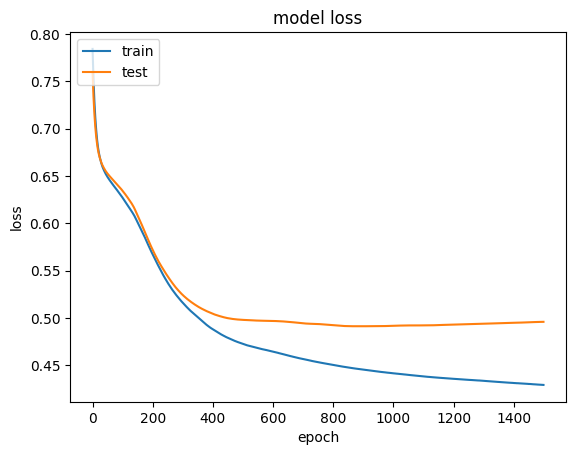

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<font color =orange> The decreasing loss observed in both training and testing suggests the model's ability to generalize effectively as training progresses. Notably, the training loss is lower compared to the testing loss, implying superior model performance during the testing phase.

In [ ]:
y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.750
roc-auc is 0.817


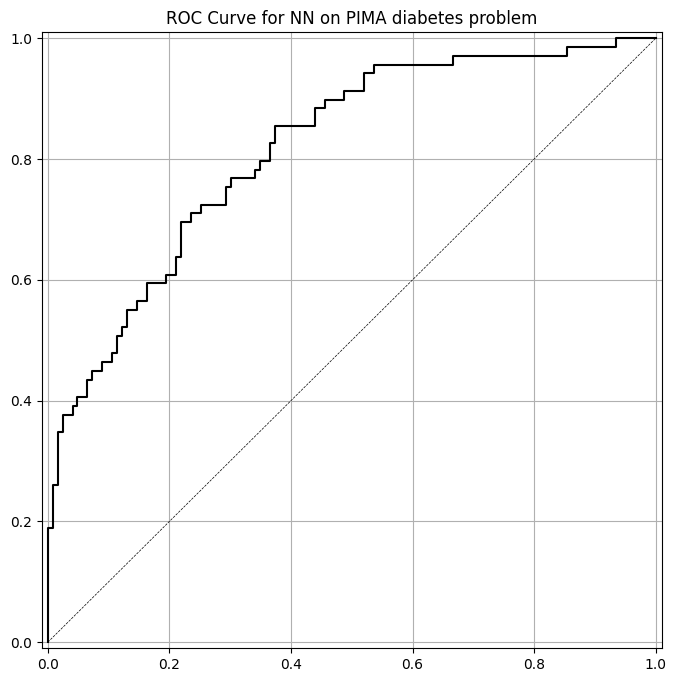

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

<font color =orange>In the 2nd model  which is 6,6,1  it got an accuracy score of 0.750 and ROC-AUC of 0.840. Both accuracy of the model suggest  that adding  an extra hidden layer  which significantly improve the model ability to make correct prediction on the test set.

<font color =orange>On a 6,6,1 model with two hidden layer achive a slight increased of ROc-AUC Score, this indicate that two-hidden layer is slightly better at classifying the two classes.

Use different learning rates, numbers of epochs, and network structures.

In [ ]:
#Model 1: Learning rate = 0.0001, Epoch = 5000, 2 hidden layer with 6 nodes
model_1  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])
model_1.compile(SGD(learning_rate = .0001), "binary_crossentropy", metrics=["accuracy"])
history_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.5784 - loss: 0.7263 - val_accuracy: 0.5365 - val_loss: 0.7415
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5672 - loss: 0.7299 - val_accuracy: 0.5312 - val_loss: 0.7414
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5475 - loss: 0.7311 - val_accuracy: 0.5312 - val_loss: 0.7413
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5453 - loss: 0.7301 - val_accuracy: 0.5312 - val_loss: 0.7412
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5461 - loss: 0.7233 - val_accuracy: 0.5312 - val_loss: 0.7411
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5409 - loss: 0.7384 - val_accuracy: 0.5312 - val_loss: 0.7410
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5931 - loss: 0.7178 - val_accuracy: 0.5365 - val_loss: 0.7408
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5968 - loss: 0.7293 - val_accuracy: 0

In [ ]:
#Model 2: Learning rate = 0.01, Epochs = 300, 1 hidden layer with 5 nodes
model_2  = Sequential([
    Dense(5, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])
model_2.compile(SGD(learning_rate = .01), "binary_crossentropy", metrics=["accuracy"])
history_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=300)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6290 - loss: 0.9107 - val_accuracy: 0.5990 - val_loss: 0.9709
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6052 - loss: 0.8906 - val_accuracy: 0.6042 - val_loss: 0.9258
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6467 - loss: 0.7821 - val_accuracy: 0.5938 - val_loss: 0.8866
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6663 - loss: 0.7374 - val_accuracy: 0.5885 - val_loss: 0.8526
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 0.7627 - val_accuracy: 0.5885 - val_loss: 0.8225
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6782 - loss: 0.6786 - val_accuracy: 0.5938 - val_loss: 0.7962
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6389 - loss: 0.6969 - val_accuracy: 0.5938 - val_loss: 0.7738
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6767 - loss: 0.6227 - val_accuracy: 0.5990 - 

In [ ]:
#Model 3: Learning rate = 0.001, Epochs = 1000, 3 hidden layers with 5 nodes
model_3 = Sequential([
    Dense(5, input_shape=(8,), activation="relu"),
    Dense(5, activation="relu"),
    Dense(5, activation="relu"),
    Dense(1, activation="sigmoid")
])
model_3.compile(SGD(learning_rate = .001), loss="binary_crossentropy", metrics=["accuracy"])
history_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6030 - loss: 0.6869 - val_accuracy: 0.6719 - val_loss: 0.6819
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6379 - loss: 0.6877 - val_accuracy: 0.6771 - val_loss: 0.6813
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6258 - loss: 0.6863 - val_accuracy: 0.6771 - val_loss: 0.6806
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6051 - loss: 0.6869 - val_accuracy: 0.6719 - val_loss: 0.6800
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6432 - loss: 0.6821 - val_accuracy: 0.6719 - val_loss: 0.6793
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6344 - loss: 0.6868 - val_accuracy: 0.6615 - val_loss: 0.6787
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6653 - loss: 0.6798 - val_accuracy: 0.6615 - val_loss: 0.6781
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6182 - loss: 0.6827 - val_accur

Plot the results of training and validation loss using different learning rates, number of epocgs and network structures

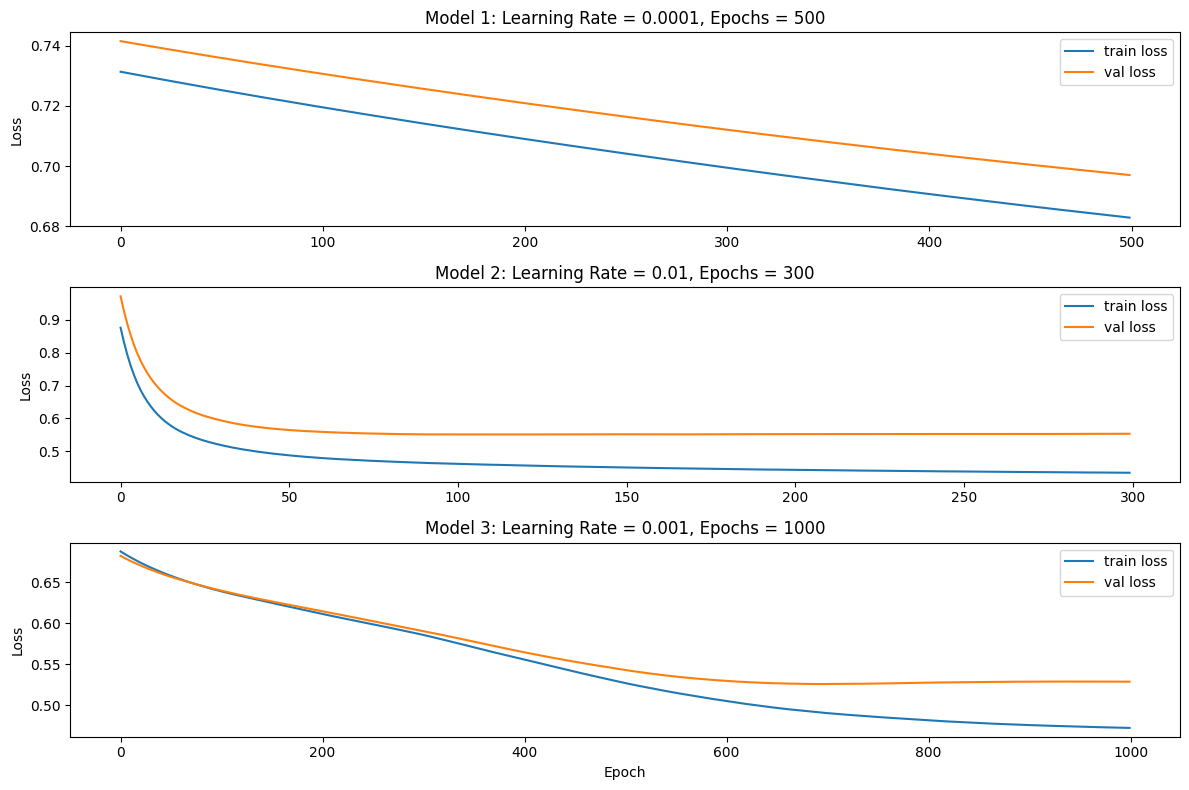

In [39]:
plt.figure(figsize=(12, 8))

#Model 1 Loss
plt.subplot(3, 1, 1)
plt.plot(history_1.history['loss'], label='train loss')
plt.plot(history_1.history['val_loss'], label='val loss')
plt.title('Model 1: Learning Rate = 0.0001, Epochs = 500')
plt.ylabel('Loss')
plt.legend()

#Model 2 Loss
plt.subplot(3, 1, 2)
plt.plot(history_2.history['loss'], label='train loss')
plt.plot(history_2.history['val_loss'], label='val loss')
plt.title('Model 2: Learning Rate = 0.01, Epochs = 300')
plt.ylabel('Loss')
plt.legend()

#Model 3 Loss
plt.subplot(3, 1, 3)
plt.plot(history_3.history['loss'], label='train loss')
plt.plot(history_3.history['val_loss'], label='val loss')
plt.title('Model 3: Learning Rate = 0.001, Epochs = 1000')
plt.ylabel('Loss')
plt.legend()

plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

<font color = orange>The performance of the three models varies based on their learning rate, number of epochs, and network complexity. Model 1, with a low learning rate (0.0001) and moderate epochs (500), shows a gradual decrease in loss, but its validation loss plateaus, suggesting a need for further tuning. Model 2, using a higher learning rate (0.01) and fewer epochs (300), experiences rapid loss reduction but becomes unstable, indicating the learning rate may be too high. Model 3, with a moderate learning rate (0.001), a high number of epochs (1000), and a more complex architecture (three hidden layers), shows smooth training loss reduction but early validation loss increase, hinting at overfitting. Overall, a lower learning rate ensures stability but slows convergence, while a higher one speeds training but risks divergence. The number of epochs must balance underfitting and overfitting, and the network's complexity should match the dataset’s intricacy to avoid unnecessary overfitting.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
Model 1:
Accuracy: 0.609
ROC-AUC: 0.335

Model 2:
Accuracy: 0.719
ROC-AUC: 0.791

Model 3:
Accuracy: 0.760
ROC-AUC: 0.798



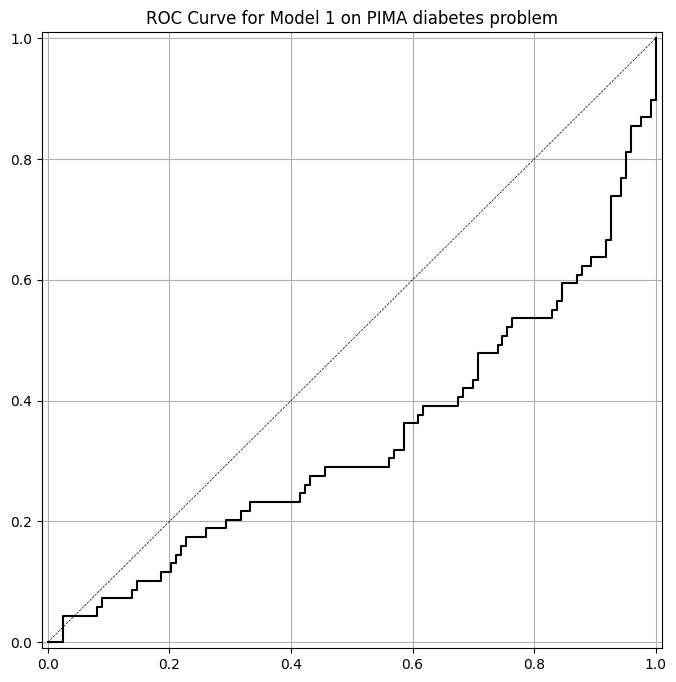

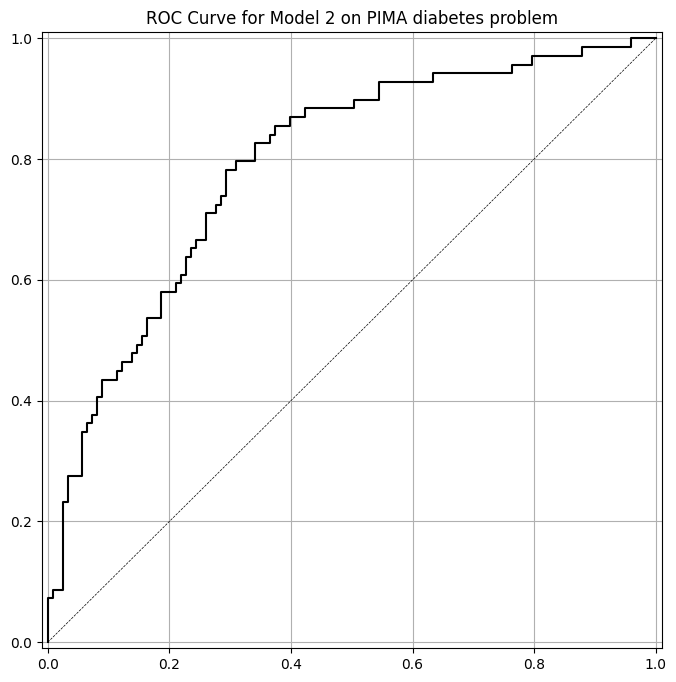

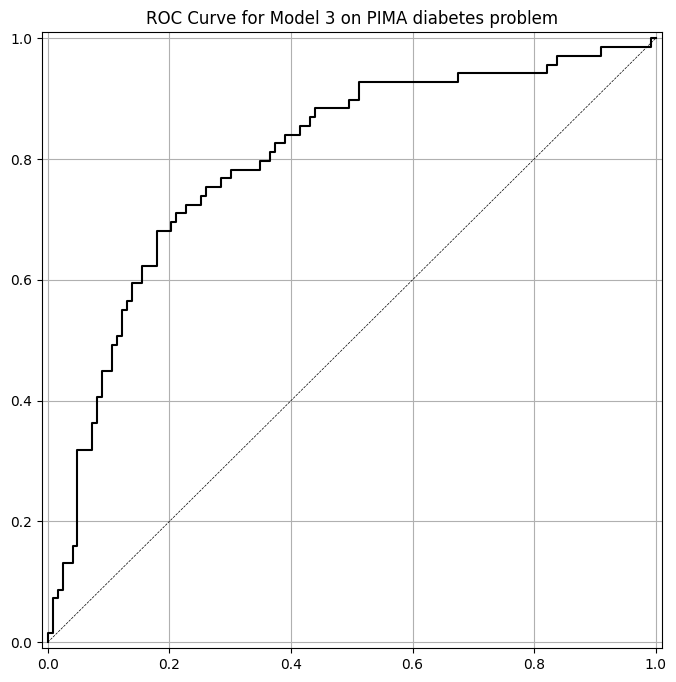

In [40]:
y_pred_prob_1 = model_1.predict(X_test_norm)
y_pred_class_1 = (y_pred_prob_1 > 0.5).astype("int32")
y_pred_prob_2 = model_2.predict(X_test_norm)
y_pred_class_2 = (y_pred_prob_2 > 0.5).astype("int32")
y_pred_prob_3 = model_3.predict(X_test_norm)
y_pred_class_3 = (y_pred_prob_3 > 0.5).astype("int32")

for i, (y_pred_class, y_pred_prob) in enumerate(zip([y_pred_class_1, y_pred_class_2, y_pred_class_3],
                                                     [y_pred_prob_1, y_pred_prob_2, y_pred_prob_3])):
    print(f"Model {i+1}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.3f}")

    plot_roc(y_test, y_pred_prob, f'Model {i+1}')
    print()

Interpret your result

<font color = orange> Model 1 achieves moderate accuracy (0.609) and a relatively good ROC-AUC score (0.335), indicating a fair ability to distinguish between classes. Model 2 outperforms Model 1 in accuracy (0.719) but has a slightly lower ROC-AUC score (0.791), suggesting better overall predictive performance but a slightly reduced ability to differentiate between classes. Model 3 has the highest accuracy (0.760) but the lowest ROC-AUC (0.798), meaning it correctly classifies more samples but might struggle slightly in distinguishing between classes. Overall, Model 2 has the best accuracy, making it the most effective for general predictions, while Model 1 has the highest ROC-AUC, indicating stronger class separation. The best model depends on priorities; if accuracy is key, Model 2 is preferable, but if distinguishing between classes is more important, Model 1 might be a better choice. Additional evaluation, such as confusion matrices and precision-recall curves, could provide further insights into each model’s strengths and weaknesses.

#### Conclusion

<font color = green> This notebook explored training neural networks for binary classification using the Pima Indians Diabetes dataset, examining how different network structures, learning rates, and epochs influence model performance. The results highlight that neural networks can effectively capture the relationship between input features and diabetes outcomes, but performance is highly dependent on hyperparameter choices. A single hidden layer with 12 nodes achieved reasonable accuracy (0.766) and a ROC-AUC score of 0.828, while a slightly more complex model with two hidden layers (6,6,1) improved ROC-AUC to 0.840 at a minor cost to accuracy (0.750). Further experiments demonstrated the trade-offs between accuracy, ROC-AUC, and model complexity, with Model 2 performing best in terms of accuracy (0.719) despite a slightly lower ROC-AUC (0.791), while Model 1 exhibited good class separation (ROC-AUC: 0.335) but lower accuracy (0.609). Model 3, with three hidden layers, achieved relatively high accuracy (0.760) but had a lower ROC-AUC score (0.798), suggesting potential overfitting or reduced discrimination ability.
